# Problem Statement
Being a part of Electric vehicle startup. We have to analyse EV market in India using segmentation analysis and come up with a feasible strategy to enter the market, targeting the segments most likely to use Electric vehicles.

# Overview of EV:
An electric vehicle (EV) is a vehicle that uses one or more electric motors for propulsion. It
can be powered by a collector system, with electricity from extravehicular sources, or it can
be powered autonomously by a battery (sometimes charged by solar panels, or by
converting fuel to electricity using fuel cells or a generator).
EVs come in various forms, from fully electric to hybrid models, each with its unique
advantages and use cases. Battery Electric Vehicles (BEVs) operate exclusively on electricity,
producing no emissions during operation. Plug-in Hybrid Electric Vehicles (PHEVs) combine
both electric and gasoline power, offering flexibility for longer journeys. Hybrid Electric
Vehicles (HEVs) use both electric and internal combustion engines but do not require
external charging.
These vehicles are equipped with advanced battery systems that store electrical energy,
which is then converted into kinetic energy to drive the vehicle's wheels. This conversion
process is highly efficient, translating a significant portion of the energy from the grid into
propulsion. As a result, EVs tend to have excellent energy efficiency, which can lead to cost
savings for consumers and reduce the overall carbon footprint.

In [1]:
# importing the libraries needed to analyze the datasets
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
EV_user_rating = pd.read_csv("datasets/combine_rating_all_vehicle.csv") #Compiling the dataset and importing it to the notebook

In [3]:
EV_user_rating

,Rating,Model Name,Type
0,1.0,TVS iQube,2-wheeler
1,1.0,TVS iQube,2-wheeler
2,3.0,TVS iQube,2-wheeler
3,1.0,TVS iQube,2-wheeler
4,1.0,TVS iQube,2-wheeler
...,...,...,...
1108,4.0,tata tigor ev,4-wheeler
1109,5.0,tata tigor ev,4-wheeler
1110,5.0,tata tigor ev,4-wheeler
1111,5.0,tata tigor ev,4-wheeler


In [4]:
EV_user_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rating      1113 non-null   float64
 1   Model Name  1113 non-null   object 
 2   Type        1113 non-null   object 
dtypes: float64(1), object(2)
memory usage: 26.2+ KB


In [5]:
EV_user_rating.describe()

,Rating
count,1113.000000
mean,3.602875
std,1.640037
min,0.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


<Axes: xlabel='Rating', ylabel='count'>

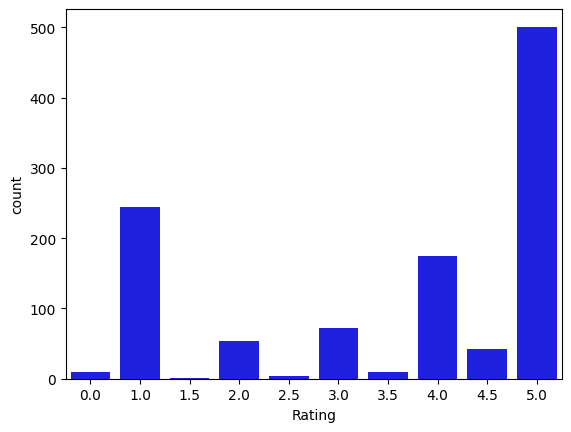

In [6]:
#Calculating number of ratings received for different types of vehicles
sns.countplot(x = 'Rating',data = EV_user_rating,color = 'blue')

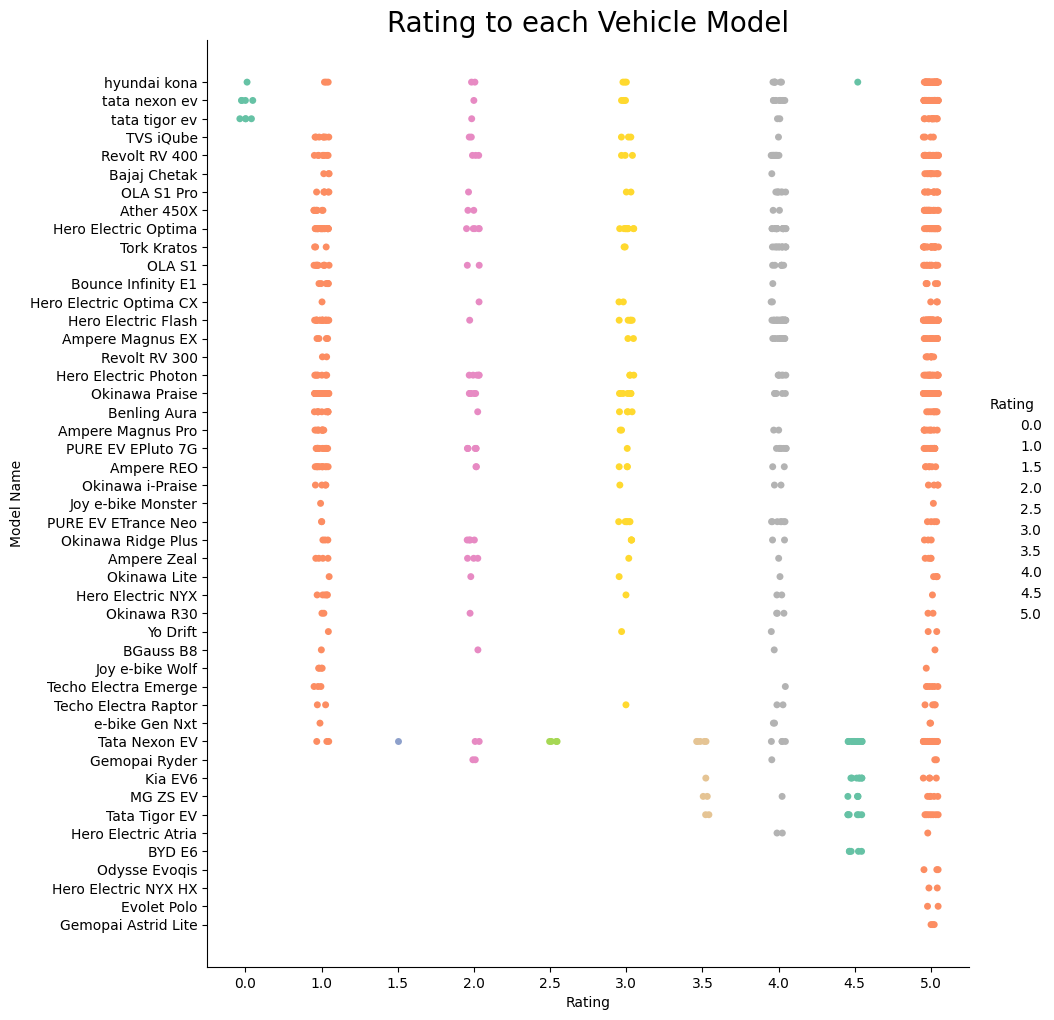

In [7]:
sns.catplot(x="Rating", y="Model Name",data = EV_user_rating,orient="v",height=10,palette="Set2",kind="strip")
plt.title('Rating to each Vehicle Model',fontsize = 20)
plt.show()

In [8]:
labels = ['4-wheeler','2-wheeler']
units = [EV_user_rating.query('Type == "4-wheeler"').Type.count(),EV_user_rating.query('Type == "2-wheeler"').Type.count()]
print(units)

[269, 844]


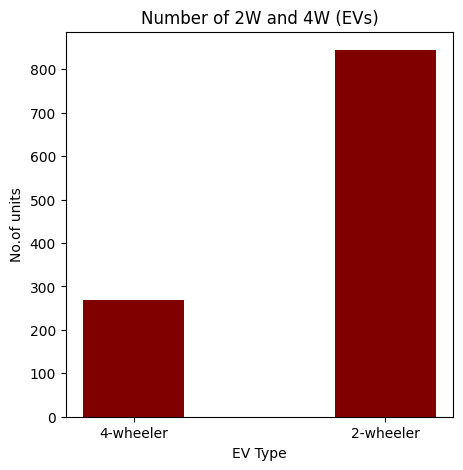

In [9]:
#Figuring out which type of EV is the best
fig = plt.figure(figsize = (5, 5))
plt.bar(labels, units, color ='maroon', width = 0.4)
plt.xlabel("EV Type")
plt.ylabel("No.of units")
plt.title("Number of 2W and 4W (EVs)")
plt.show()

In [10]:
#Compiling the second dataset and importing it
charging_stations_India = pd.read_csv("datasets/charging_station.csv")
charging_stations_India.head(15)

,State/ UTs,No. of charging stations
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,235
8,West Bengal,141
9,Telangana,138


In [11]:
#Analyzing the data and collecting the number of the charging points
charging_stations_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   State/ UTs                25 non-null     object
 1   No. of charging stations  25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 532.0+ bytes


In [12]:
charging_stations_India.describe()

,No. of charging stations
count,25.000000
mean,115.080000
std,105.731941
min,10.000000
25%,25.000000
50%,70.000000
75%,207.000000
max,317.000000


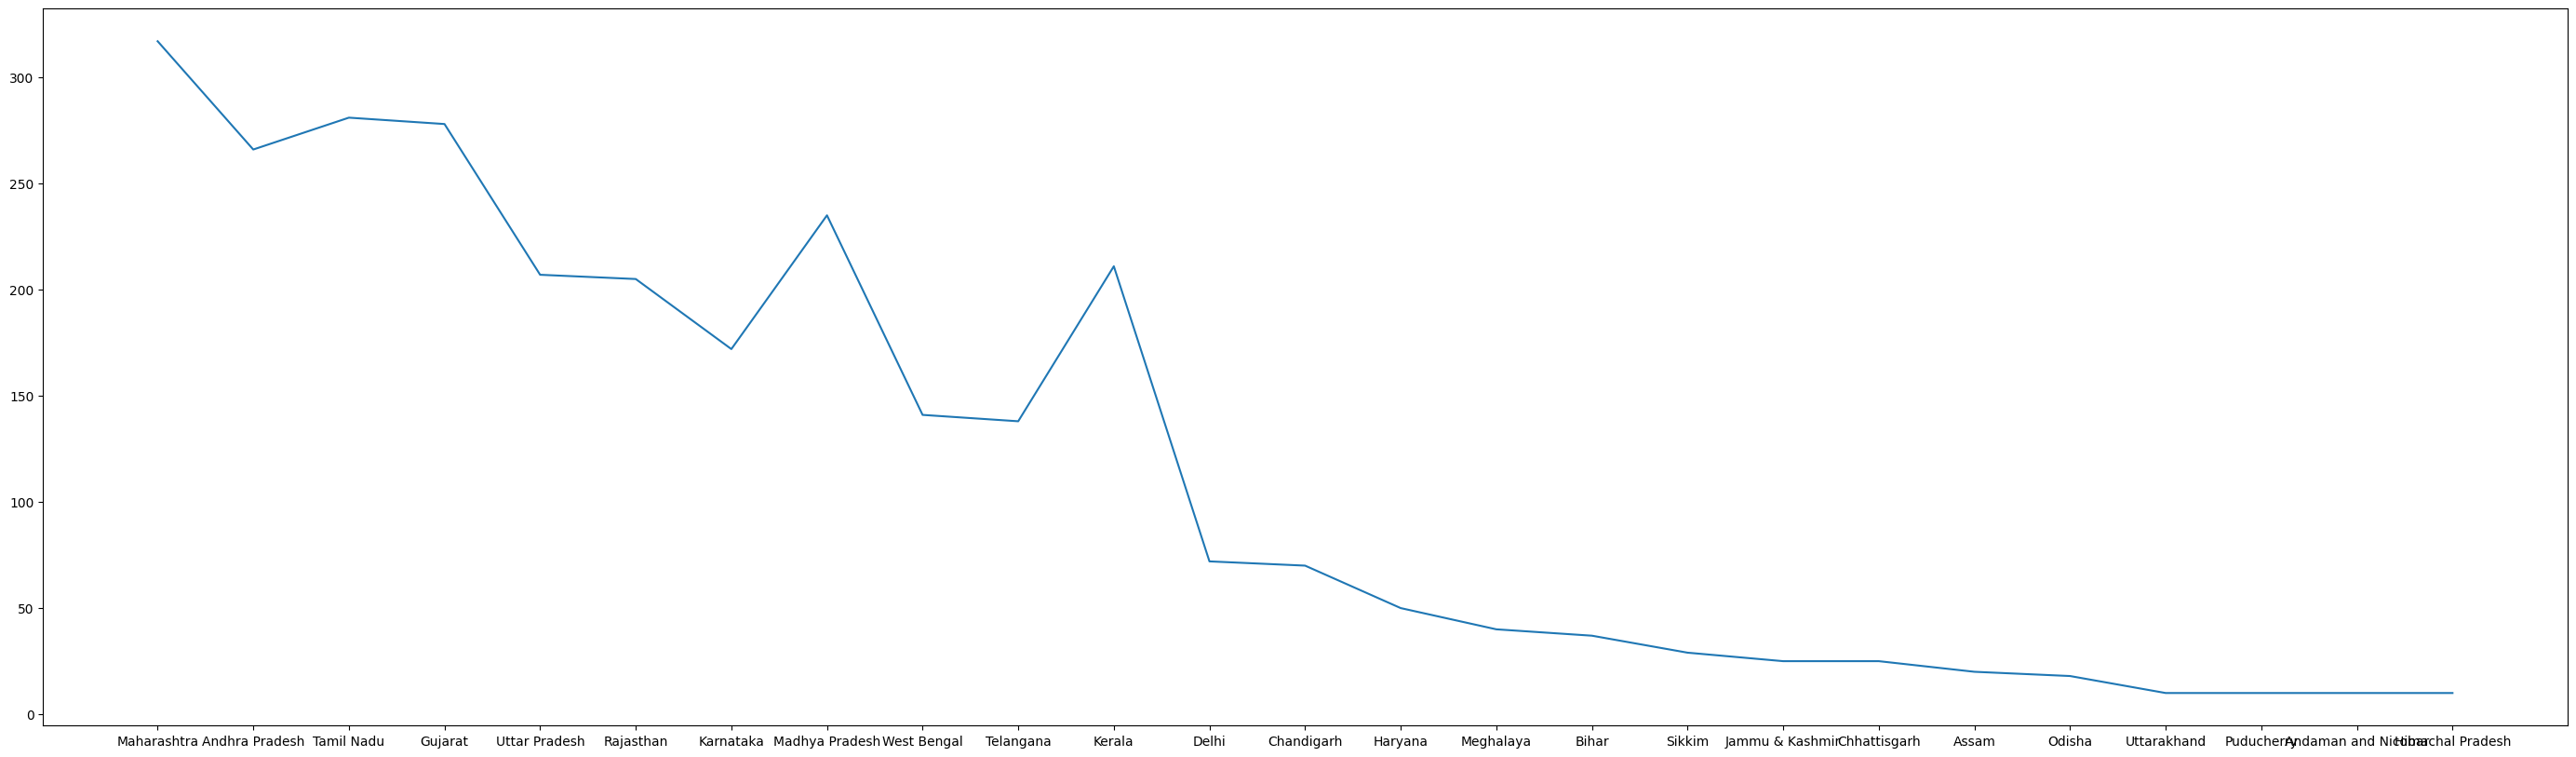

In [13]:
#Number of stations vs all the states
x = charging_stations_India['State/ UTs']
y = charging_stations_India['No. of charging stations']
tickvalues = range(0,len(x))
plt.figure(figsize = (35,10))
plt.plot(x,y)


In [14]:
EVs_India = EV_user_rating['Model Name'].value_counts()
print(EVs_India)

Model Name
Hero Electric Flash        102
Okinawa Praise              95
Hero Electric Optima        82
tata nexon ev               75
Tata Nexon EV               74
hyundai kona                56
Revolt RV 400               52
PURE EV EPluto 7G           50
Tork Kratos                 38
Hero Electric Photon        38
Ather 450X                  30
OLA S1                      29
Ampere Magnus EX            28
OLA S1 Pro                  28
Ampere REO                  24
Benling Aura                22
Ampere Magnus Pro           22
tata tigor ev               20
PURE EV ETrance Neo         19
TVS iQube                   17
Bajaj Chetak                15
Okinawa Ridge Plus          15
Tata Tigor EV               15
Ampere Zeal                 13
MG ZS EV                    12
Kia EV6                     12
Bounce Infinity E1          12
Okinawa i-Praise            11
Revolt RV 300               10
Techo Electra Emerge        10
Hero Electric Optima CX      9
Techo Electra Raptor        

In [15]:
import plotly as px

In [16]:
Indian_purchase_behaviour = pd.read_csv("datasets/behavioural_dataset.csv")
Indian_purchase_behaviour.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
Indian_purchase_behaviour.rename(columns={'Price':'EV_Price'},inplace=True)
Indian_purchase_behaviour.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


[32, 67]


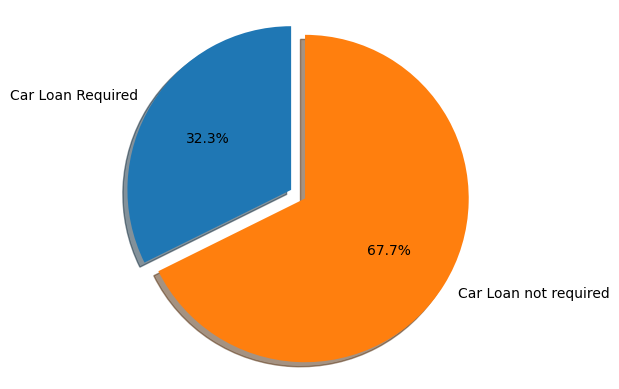

In [17]:
labels = ['Car Loan Required','Car Loan not required']
Loan_status = [Indian_purchase_behaviour.query('Car_Loan == "Yes"').Car_Loan.count(),Indian_purchase_behaviour.query('Car_Loan == "No"').Car_Loan.count()]
print(Loan_status)

import matplotlib.pyplot as plt

explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(Loan_status, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

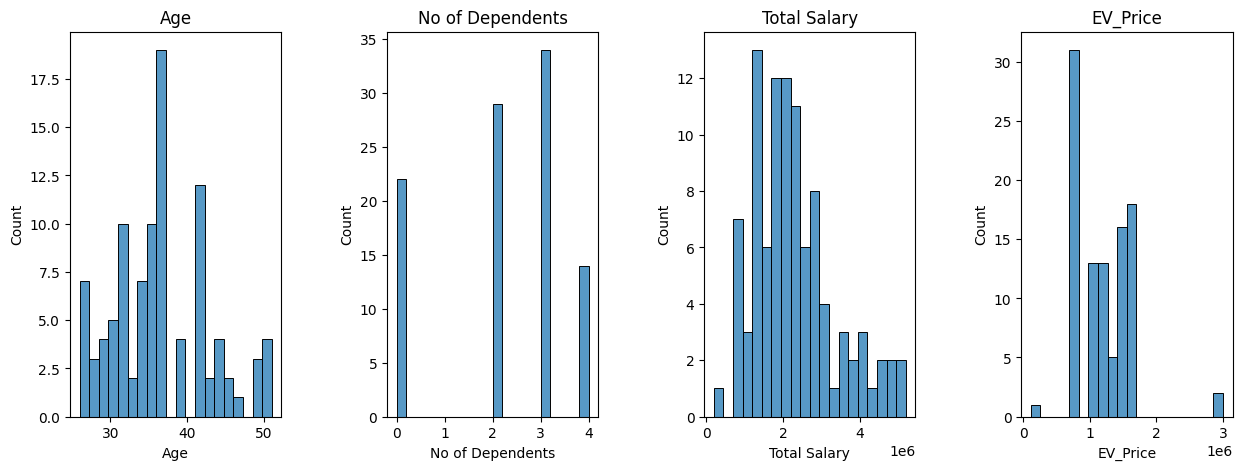

In [18]:
plt.figure(1, figsize=(15,5))
n=0
group_labels = ['Group 1', 'Group 2', 'Group 3','Group 4']
for x in ['Age', 'No of Dependents' ,'Total Salary'  ,'EV_Price']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(Indian_purchase_behaviour[x], bins= 20)
  plt.title('{}'.format(x))
plt.show()


In [19]:
features = list(Indian_purchase_behaviour.columns)
features

['Age',
 'Profession',
 'Marrital Status',
 'Education',
 'No of Dependents',
 'Car_Loan',
 'Total Salary',
 'EV_Price']

In [20]:
cluster_data = Indian_purchase_behaviour[features]
cluster_data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [21]:
from sklearn.preprocessing import LabelEncoder

cols = ['Profession', 'Marrital Status', 'Education', 'Car_Loan']
Indian_purchase_behaviour[cols] = Indian_purchase_behaviour[cols].apply(LabelEncoder().fit_transform)
Indian_purchase_behaviour.head()


,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,1,1,1,0,1,800000,800000
1,35,1,0,1,2,1,2000000,1000000
2,45,0,0,0,4,1,1800000,1200000
3,41,0,0,1,3,0,2200000,1200000
4,31,1,0,1,2,1,2600000,1600000


In [22]:
cluster_data.dtypes

Age                  int64
Profession          object
Marrital Status     object
Education           object
No of Dependents     int64
Car_Loan            object
Total Salary         int64
EV_Price             int64
dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in ['Profession', 'Marrital Status', 'Education', 'Car_Loan']:
    cluster_data[col] = label_encoder.fit_transform(cluster_data[col])

# Now run the clustering
from sklearn.cluster import KMeans
clustering_kmeans = KMeans(n_clusters=2)
cluster_data['clusters'] = clustering_kmeans.fit_predict(cluster_data)

# Check the result
cluster_data.head()


,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price,clusters
0,27,1,1,1,0,1,800000,800000,1
1,35,1,0,1,2,1,2000000,1000000,1
2,45,0,0,0,4,1,1800000,1200000,1
3,41,0,0,1,3,0,2200000,1200000,1
4,31,1,0,1,2,1,2600000,1600000,1


In [24]:
cluster_data['clusters'].value_counts()

clusters
1    76
0    23
Name: count, dtype: int64

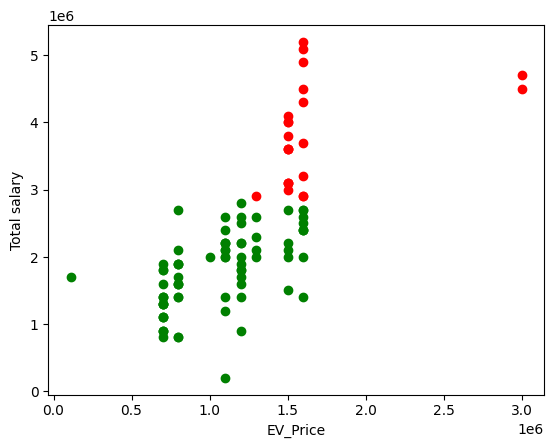

In [25]:
Cluster_0 = cluster_data[cluster_data.clusters==0]
Cluster_1 = cluster_data[cluster_data.clusters==1]

plt.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'],color='red')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],color='green')

plt.xlabel('EV_Price')
plt.ylabel('Total salary')
plt.show()

In [26]:
from sklearn.preprocessing import MinMaxScaler

x = cluster_data['Age'].values.reshape(-1, 1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
cluster_data['Age']= x_scaled

x = cluster_data['Total Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
cluster_data['Total Salary']= x_scaled

x = cluster_data['EV_Price'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
cluster_data['EV_Price']= x_scaled

In [27]:
cluster_data['clusters'] = clustering_kmeans.fit_predict(cluster_data) 
cluster_data

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price,clusters
0,0.04,1,1,1,0,1,0.12,0.238754,0
1,0.36,1,0,1,2,1,0.36,0.307958,1
2,0.76,0,0,0,4,1,0.32,0.377163,1
3,0.60,0,0,1,3,0,0.40,0.377163,1
4,0.20,1,0,1,2,1,0.48,0.515571,1
...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0.44,0.515571,0
95,0.96,1,0,1,3,0,0.98,0.515571,1
96,1.00,0,0,0,2,1,0.40,0.342561,1
97,1.00,1,0,1,2,0,0.76,0.480969,1


In [28]:
clustering_kmeans = KMeans(n_clusters=3)
cluster_data['clusters'] = clustering_kmeans.fit_predict(cluster_data) 
cluster_data

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price,clusters
0,0.04,1,1,1,0,1,0.12,0.238754,1
1,0.36,1,0,1,2,1,0.36,0.307958,2
2,0.76,0,0,0,4,1,0.32,0.377163,0
3,0.60,0,0,1,3,0,0.40,0.377163,0
4,0.20,1,0,1,2,1,0.48,0.515571,2
...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0.44,0.515571,1
95,0.96,1,0,1,3,0,0.98,0.515571,0
96,1.00,0,0,0,2,1,0.40,0.342561,2
97,1.00,1,0,1,2,0,0.76,0.480969,2


In [29]:
cluster_data['clusters'].value_counts()

clusters
0    48
2    29
1    22
Name: count, dtype: int64

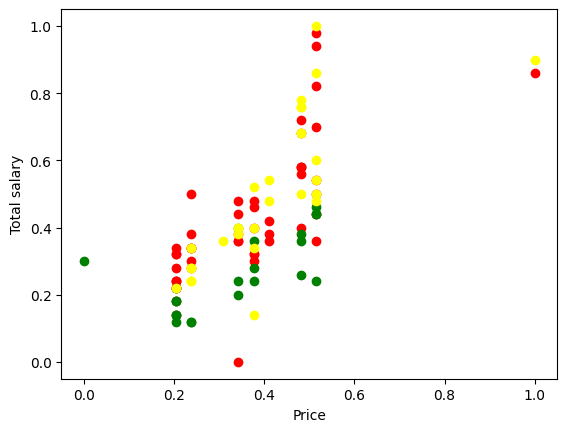

In [30]:
Cluster_0 = cluster_data[cluster_data.clusters==0]
Cluster_1 = cluster_data[cluster_data.clusters==1]
Cluster_2 = cluster_data[cluster_data.clusters==2]
plt.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'],color='red')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],color='green')
plt.scatter(Cluster_2.EV_Price, Cluster_2['Total Salary'],color='yellow')

plt.xlabel('Price')
plt.ylabel('Total salary')
plt.show()

In [31]:
clustering_kmeans.cluster_centers_

array([[ 5.01666667e-01,  5.83333333e-01,  8.32667268e-17,
         5.41666667e-01,  3.29166667e+00,  3.95833333e-01,
         4.28750000e-01,  3.69232987e-01,  1.00000000e+00],
       [ 1.38181818e-01,  6.36363636e-01,  5.90909091e-01,
         5.45454545e-01,  8.88178420e-16,  1.81818182e-01,
         2.64545455e-01,  3.34853728e-01, -3.33066907e-16],
       [ 4.73103448e-01,  7.58620690e-01,  6.89655172e-02,
         6.20689655e-01,  2.00000000e+00,  3.10344828e-01,
         5.03448276e-01,  4.15344231e-01,  1.00000000e+00]])

In [32]:
k_range = range(1,10)
sse = []
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(cluster_data)
  sse.append(km.inertia_)

In [33]:
sse

[342.10749993845377,
 162.67374027480116,
 94.05399956032963,
 81.14932108581414,
 72.87419367377757,
 67.47910479399742,
 59.25415998755126,
 55.78604771382018,
 49.48147836621261]

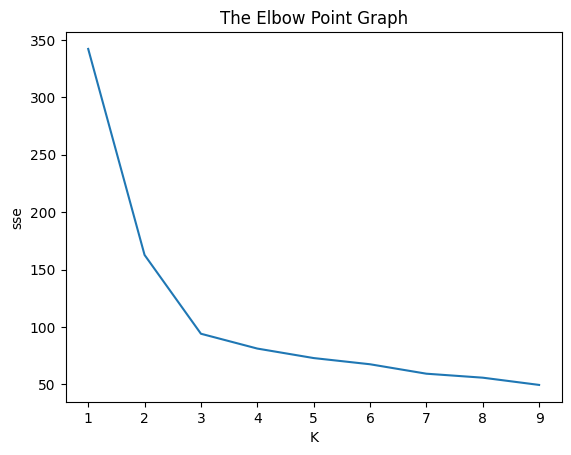

In [34]:
# Range of prices for target customers
plt.title('The Elbow Point Graph')
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_range,sse)

In [35]:
features

['Age',
 'Profession',
 'Marrital Status',
 'Education',
 'No of Dependents',
 'Car_Loan',
 'Total Salary',
 'EV_Price']

In [36]:
clustering_kmeans = KMeans(n_clusters = 6)
cluster_data['clusters'] = clustering_kmeans.fit_predict(cluster_data) 
cluster_data

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price,clusters
0,0.04,1,1,1,0,1,0.12,0.238754,3
1,0.36,1,0,1,2,1,0.36,0.307958,1
2,0.76,0,0,0,4,1,0.32,0.377163,4
3,0.60,0,0,1,3,0,0.40,0.377163,4
4,0.20,1,0,1,2,1,0.48,0.515571,1
...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0.44,0.515571,5
95,0.96,1,0,1,3,0,0.98,0.515571,0
96,1.00,0,0,0,2,1,0.40,0.342561,1
97,1.00,1,0,1,2,0,0.76,0.480969,2


In [37]:
labels = clustering_kmeans.labels_
labels

array([3, 1, 4, 4, 1, 0, 0, 4, 4, 0, 0, 0, 3, 1, 4, 0, 3, 5, 2, 3, 0, 4,
       4, 4, 0, 2, 0, 4, 0, 2, 4, 0, 0, 4, 0, 0, 3, 3, 3, 3, 4, 3, 3, 0,
       1, 0, 4, 2, 2, 0, 4, 0, 0, 4, 2, 0, 0, 3, 5, 5, 3, 3, 5, 0, 2, 4,
       1, 2, 1, 4, 2, 2, 2, 3, 5, 2, 1, 4, 0, 2, 0, 2, 0, 2, 0, 4, 5, 2,
       2, 4, 2, 0, 2, 3, 5, 0, 1, 2, 1])

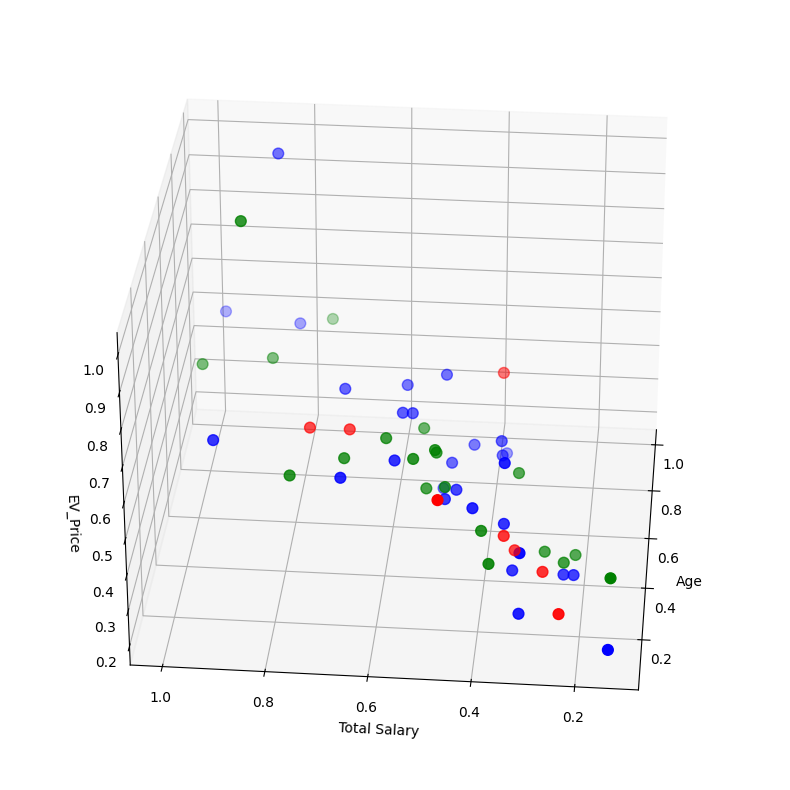

In [38]:
# 3D/spatial graph for better understanding
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_data.Age[labels == 0], cluster_data["Total Salary"][labels == 0], cluster_data["EV_Price"][labels == 0],  c='blue', s=60)
ax.scatter(cluster_data.Age[labels == 1], cluster_data["Total Salary"][labels == 1], cluster_data["EV_Price"][labels == 1],  c='red', s=60)
ax.scatter(cluster_data.Age[labels == 2], cluster_data["Total Salary"][labels == 2], cluster_data["EV_Price"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)

plt.xlabel("Age")
plt.ylabel("Total Salary")
ax.set_zlabel('EV_Price')
plt.show()

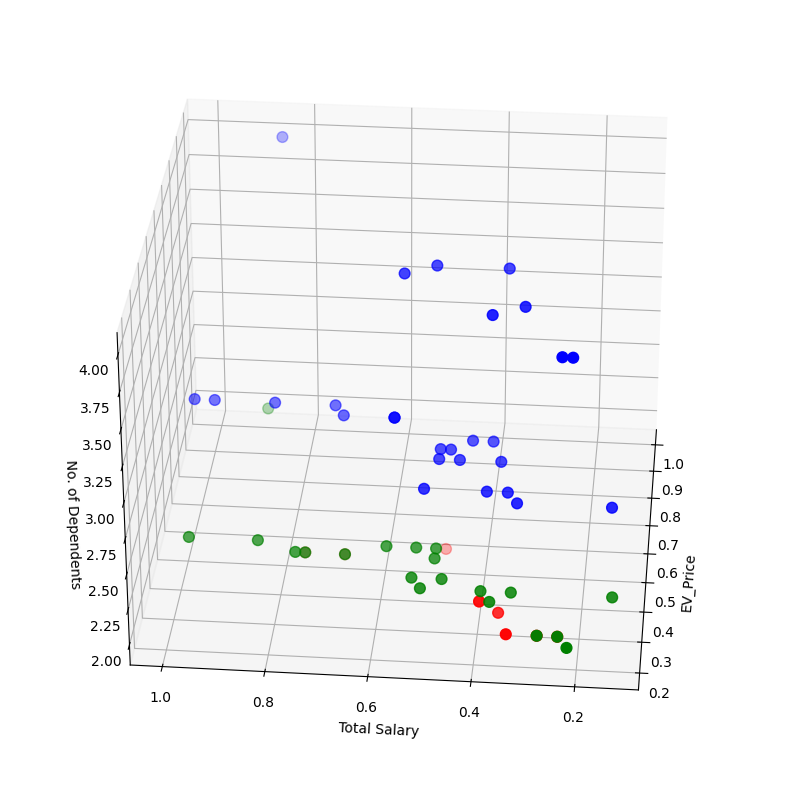

In [39]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_data.EV_Price[labels == 0], cluster_data["Total Salary"][labels == 0], cluster_data["No of Dependents"][labels == 0],  c='blue', s=60)
ax.scatter(cluster_data.EV_Price[labels == 1], cluster_data["Total Salary"][labels == 1], cluster_data["No of Dependents"][labels == 1],  c='red', s=60)
ax.scatter(cluster_data.EV_Price[labels == 2], cluster_data["Total Salary"][labels == 2], cluster_data["No of Dependents"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)

plt.xlabel("EV_Price")
plt.ylabel("Total Salary")
ax.set_zlabel('No. of Dependents')
plt.show()

# Conclusion
At the conclusion of our research, we successfully identified our target audience: individuals with moderate incomes, postgraduate education, and who are married, typically residing in areas with a high availability of charging points. While demand fluctuated between two-wheelers and four-wheelers, two-wheelers remained more popular due to their mobility and agility.

This report has been instrumental in helping us identify potential buyers for our upcoming electric vehicles. Most of the data was sourced from reputable websites, ensuring the reliability of the findings.

The best market segment for electric vehicles (EVs) in India is a complex choice that depends on factors like market conditions, consumer preferences, and the startup's goals. India’s fast-changing market presents many opportunities for EV adoption across different segments.

Success will come from thorough market research to find the segments with the most growth potential. Urban commuters, delivery services, fleet operators, eco-conscious consumers, and government fleets are all promising groups, but the right choice should match the startup's strengths, resources, and long-term plans.

Additionally, addressing India’s unique challenges—such as the need for better charging infrastructure, government incentives, and making EVs affordable—will be key to making them more attractive and accessible to consumers.

As the EV industry grows, startups should stay flexible and responsive to changes in the market. By keeping up with consumer trends, using new technology, and working with important partners, startups can help drive EV adoption in India and support a more sustainable future in transportation.